praticing missing values


In [135]:
#import librares 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [136]:
variables = sns.load_dataset('planets')
variables.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [137]:
variables


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


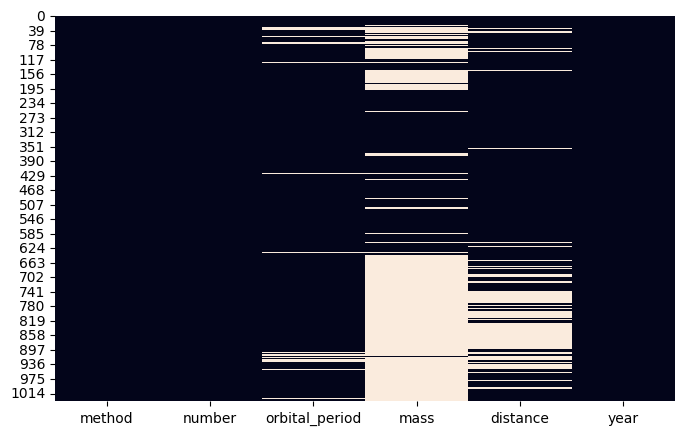

In [138]:
plt.figure(figsize=(8,5))
sns.heatmap(variables.isnull(),cbar=False)
plt.show()

In [139]:
variables.isnull().sum().sort_values(ascending=False)

mass              522
distance          227
orbital_period     43
method              0
number              0
year                0
dtype: int64

In [140]:
round(variables['orbital_period'].median())

40

In [141]:
round(variables['mass'].median())

1

In [81]:
#tryping imputing missing values 
variables['orbital_period']=variables['orbital_period'].fillna(variables['orbital_period'].median())

In [82]:
variables.isnull().sum().sort_values(ascending=False)

mass              522
distance          227
number              0
method              0
orbital_period      0
year                0
dtype: int64

In [83]:
round(variables['distance'].median())

55

In [84]:
variables['distance']=variables['distance'].fillna(variables['distance'].median())

In [85]:
variables.isnull().sum().sort_values(ascending=False)

mass              522
method              0
number              0
orbital_period      0
distance            0
year                0
dtype: int64

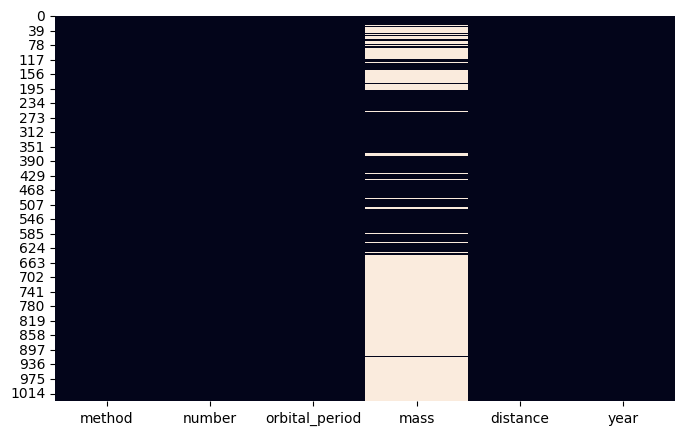

In [86]:
plt.figure(figsize=(8,5))
sns.heatmap(variables.isnull(),cbar=False)
plt.show()

In [87]:
round(variables['mass'].mean())

3

In [88]:
round(variables['mass'].median())

1

In [89]:
#drop mass missing vaules 
variables.drop('mass',axis=1,inplace=True)

In [90]:
variables.isnull().sum().sort_values(ascending=False)

method            0
number            0
orbital_period    0
distance          0
year              0
dtype: int64

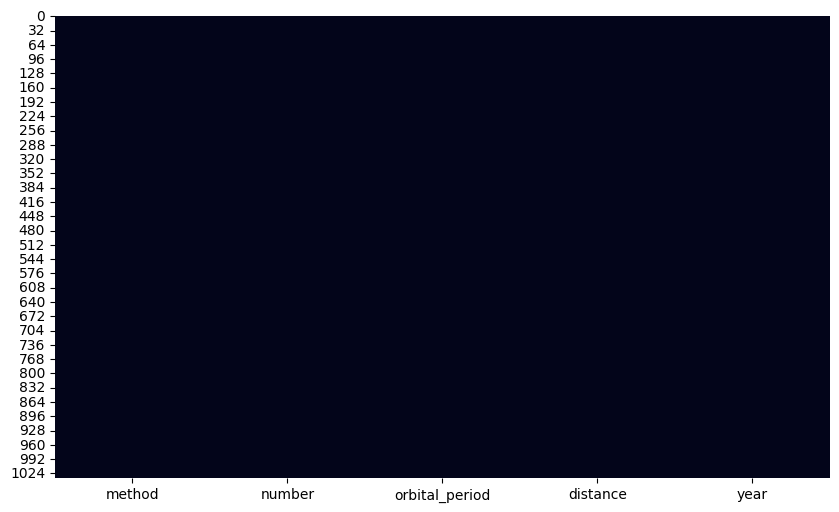

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(variables.isnull(),cbar= False)
plt.show()

In [92]:
variables

,method,number,orbital_period,distance,year
0,Radial Velocity,1,269.300000,77.40,2006
1,Radial Velocity,1,874.774000,56.95,2008
2,Radial Velocity,1,763.000000,19.84,2011
3,Radial Velocity,1,326.030000,110.62,2007
4,Radial Velocity,1,516.220000,119.47,2009
...,...,...,...,...,...
1030,Transit,1,3.941507,172.00,2006
1031,Transit,1,2.615864,148.00,2007
1032,Transit,1,3.191524,174.00,2007
1033,Transit,1,4.125083,293.00,2008


In [93]:
datas = sns.load_dataset('planets')
datas.isnull().sum().sort_values(ascending=False)

mass              522
distance          227
orbital_period     43
method              0
number              0
year                0
dtype: int64

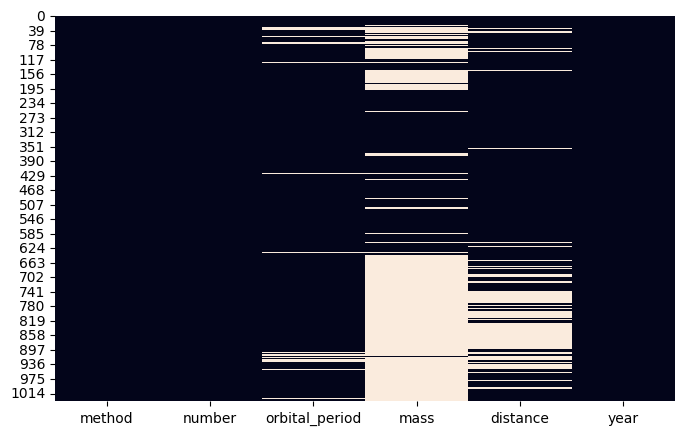

In [94]:
plt.figure(figsize=(8,5))
sns.heatmap(datas.isnull(),cbar=False)
plt.show()


missing value imput using scikit-learn


In [95]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy='median')
datas['mass']=im.fit_transform(datas[['mass']])

Iterrative imputer


In [96]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
proc = IterativeImputer()
datas['mass']=proc.fit_transform(datas[['mass']])

using forwardfill and backwoadfill fron scikit-learn

In [97]:
datas['mass']=datas['mass'].ffill()

In [98]:
datas.isnull().sum().sort_values(ascending=False)

distance          227
orbital_period     43
number              0
method              0
mass                0
year                0
dtype: int64

REMOVE INCONSISTECNY VALUE FROM DATASET USING IMPUT OR OTHER TECHNIQUE 


In [99]:
import numpy as np
import pandas as pd 
import seaborn as sns 


In [100]:
data = {
    'dob':[
        '2023-8-15','5-12-2000','24-07-2005',np.nan,'2023-01-02',
        np.nan, '2023-01-08', '2023-01-10', np.nan
    ],
    'Name':['Hafiz','hafiz','hajiz',np.nan,'jhon','Doe','Jack',np.nan,np.nan],
    'Country':['Bangladesh',np.nan,'Pakistan','bangladesh','bangladesh','bangladesh','bangladesh','bangladesh','bangladesh']
    }
df = pd.DataFrame(data)
df


,dob,Name,Country
0,2023-8-15,Hafiz,Bangladesh
1,5-12-2000,hafiz,NaN
2,24-07-2005,hajiz,Pakistan
3,NaN,NaN,bangladesh
4,2023-01-02,jhon,bangladesh
5,NaN,Doe,bangladesh
6,2023-01-08,Jack,bangladesh
7,2023-01-10,NaN,bangladesh
8,NaN,NaN,bangladesh


In [101]:
df.isnull().sum().sort_values(ascending=False)

dob        3
Name       3
Country    1
dtype: int64

Normal imputing date of birth 


hobe na normal imput

imput using forwardfill or backword fill 

In [102]:
df['dob']=df['dob'].ffill()

In [103]:
df

,dob,Name,Country
0,2023-8-15,Hafiz,Bangladesh
1,5-12-2000,hafiz,NaN
2,24-07-2005,hajiz,Pakistan
3,24-07-2005,NaN,bangladesh
4,2023-01-02,jhon,bangladesh
5,2023-01-02,Doe,bangladesh
6,2023-01-08,Jack,bangladesh
7,2023-01-10,NaN,bangladesh
8,2023-01-10,NaN,bangladesh


In [104]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['dob'] = df['dob'].dt.strftime('%Y-%m-%d')
df.head()

,dob,Name,Country
0,2023-08-15,Hafiz,Bangladesh
1,NaN,hafiz,NaN
2,NaN,hajiz,Pakistan
3,NaN,NaN,bangladesh
4,2023-01-02,jhon,bangladesh


In [105]:
df['dob']=df['dob'].ffill()

In [106]:
df

,dob,Name,Country
0,2023-08-15,Hafiz,Bangladesh
1,2023-08-15,hafiz,NaN
2,2023-08-15,hajiz,Pakistan
3,2023-08-15,NaN,bangladesh
4,2023-01-02,jhon,bangladesh
5,2023-01-02,Doe,bangladesh
6,2023-01-08,Jack,bangladesh
7,2023-01-10,NaN,bangladesh
8,2023-01-10,NaN,bangladesh


In [107]:
df['Name']=df['Name'].ffill()

In [108]:

df

,dob,Name,Country
0,2023-08-15,Hafiz,Bangladesh
1,2023-08-15,hafiz,NaN
2,2023-08-15,hajiz,Pakistan
3,2023-08-15,hajiz,bangladesh
4,2023-01-02,jhon,bangladesh
5,2023-01-02,Doe,bangladesh
6,2023-01-08,Jack,bangladesh
7,2023-01-10,Jack,bangladesh
8,2023-01-10,Jack,bangladesh


In [109]:
df

,dob,Name,Country
0,2023-08-15,Hafiz,Bangladesh
1,2023-08-15,hafiz,NaN
2,2023-08-15,hajiz,Pakistan
3,2023-08-15,hajiz,bangladesh
4,2023-01-02,jhon,bangladesh
5,2023-01-02,Doe,bangladesh
6,2023-01-08,Jack,bangladesh
7,2023-01-10,Jack,bangladesh
8,2023-01-10,Jack,bangladesh


In [110]:
df['Country'] = df['Country'].ffill()

In [111]:
df

,dob,Name,Country
0,2023-08-15,Hafiz,Bangladesh
1,2023-08-15,hafiz,Bangladesh
2,2023-08-15,hajiz,Pakistan
3,2023-08-15,hajiz,bangladesh
4,2023-01-02,jhon,bangladesh
5,2023-01-02,Doe,bangladesh
6,2023-01-08,Jack,bangladesh
7,2023-01-10,Jack,bangladesh
8,2023-01-10,Jack,bangladesh


In [112]:
country_mapping = {"bangladesh":"Bangladesh"}
df['Country']=df['Country'].replace(country_mapping)

In [113]:
df

,dob,Name,Country
0,2023-08-15,Hafiz,Bangladesh
1,2023-08-15,hafiz,Bangladesh
2,2023-08-15,hajiz,Pakistan
3,2023-08-15,hajiz,Bangladesh
4,2023-01-02,jhon,Bangladesh
5,2023-01-02,Doe,Bangladesh
6,2023-01-08,Jack,Bangladesh
7,2023-01-10,Jack,Bangladesh
8,2023-01-10,Jack,Bangladesh


---

Merging two values 



In [114]:
#import librares
import pandas as pd 
import numpy as np 


In [115]:
data = pd.DataFrame({
    'id':[1,2,3],
    'Name':['Hafiz','Emon','Fahim'],
})
data

,id,Name
0,1,Hafiz
1,2,Emon
2,3,Fahim


In [116]:
#Second dataset 
data2 = pd.DataFrame({
    'id':[1,2,3],
    'Country':['Pakistan','Bangladesh','China'],
    'Occupation':['Doctor','Engineer','Teacher']
})


In [117]:
merged_df = pd.merge(data,data2)

In [118]:
merged_df

,id,Name,Country,Occupation
0,1,Hafiz,Pakistan,Doctor
1,2,Emon,Bangladesh,Engineer
2,3,Fahim,China,Teacher


---
Concatanation

In [119]:
data1 = pd.DataFrame({ 'Name':['Hafiz','Emon','Fahim'],'Age':[23,24,25]})
data2 = pd.DataFrame({ 'Name':['Sara','Usma','Aisha'],'Age':[28,15,30]})
data3 = pd.DataFrame({'City':['Dhaka','Chittagong','Khulna'],'Province':['Islamabad','Sindh','Punjab']})


In [120]:
concate_row = pd.concat([data1,data2])

In [121]:
concate_row

,Name,Age
0,Hafiz,23
1,Emon,24
2,Fahim,25
0,Sara,28
1,Usma,15
2,Aisha,30


In [122]:
Concat_col = pd.concat([data1,data3],axis=1)

In [123]:
Concat_col.head()

,Name,Age,City,Province
0,Hafiz,23,Dhaka,Islamabad
1,Emon,24,Chittagong,Sindh
2,Fahim,25,Khulna,Punjab


---
OUTLIER

In [124]:
#import important libraries
import pandas as pd 
import numpy as np 
 

In [125]:
df = pd.DataFrame({
    #need long age dataset atleast 10 rows with outliers
   'Age':[23,24,25,26,27,28,29,30,31,32,50],
})
df

mean = df['Age'].mean()

std = df['Age'].std()

#Calculating z score
df['Z-Score']=(df['Age']-mean)/std

out = df[df['Z-Score']>1]
print("outlier:",out)
data = df[df['Z-Score']<1]

data


outlier:     Age   Z-Score
10   50  2.776509


,Age,Z-Score
0,23,-0.888483
1,24,-0.752742
2,25,-0.617002
3,26,-0.481261
4,27,-0.345521
5,28,-0.209781
6,29,-0.074040
7,30,0.061700
8,31,0.197441
9,32,0.333181


In [126]:
# Import libraries
import numpy as np
from scipy import stats

# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5 
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


----
SCALING 


In [127]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, MaxAbsScaler


In [128]:
# make a meaningful dataset
data = pd.DataFrame({
    'Age':[23,24,25,26,27,28,29,30,31,32],
    'Height':[5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4],
    'Weight':[150,160,170,180,190,200,210,220,230,240]
})
data.head()

,Age,Height,Weight
0,23,5.5,150
1,24,5.6,160
2,25,5.7,170
3,26,5.8,180
4,27,5.9,190


In [129]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns = data.columns)
scaled_df.head()

,Age,Height,Weight
0,-1.566699,-1.566699,-1.566699
1,-1.218544,-1.218544,-1.218544
2,-0.870388,-0.870388,-0.870388
3,-0.522233,-0.522233,-0.522233
4,-0.174078,-0.174078,-0.174078


In [130]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns = data.columns)
scaled_df.head()

,Age,Height,Weight
0,0.000000,0.000000,0.000000
1,0.111111,0.111111,0.111111
2,0.222222,0.222222,0.222222
3,0.333333,0.333333,0.333333
4,0.444444,0.444444,0.444444


In [131]:
scaler = MaxAbsScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns = data.columns)
scaled_df.head()

,Age,Height,Weight
0,0.71875,0.859375,0.625000
1,0.75000,0.875000,0.666667
2,0.78125,0.890625,0.708333
3,0.81250,0.906250,0.750000
4,0.84375,0.921875,0.791667


--- 
Transformation


In [132]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as plt 



In [133]:
np.random.seed(0)
df = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(df, columns = ['Values'])


<Axes: xlabel='Values', ylabel='Count'>

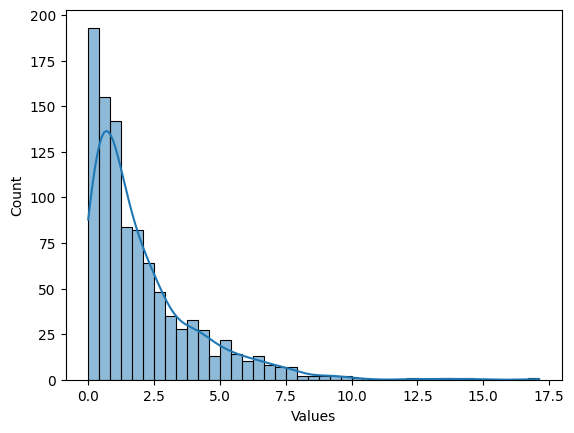

In [134]:
sns.histplot(df['Values'],kde = True)

In [152]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo = PowerTransformer(method='yeo-johnson')
Qualtile = QuantileTransformer(output_distribution='normal')

df['Box_Cox']= pt_boxcox.fit_transform(df[['Values']])
df['Yeo'] = pt_yeo.fit_transform(df[['Values']])
df['Quantile']= Qualtile.fit_transform(df[['Values']])



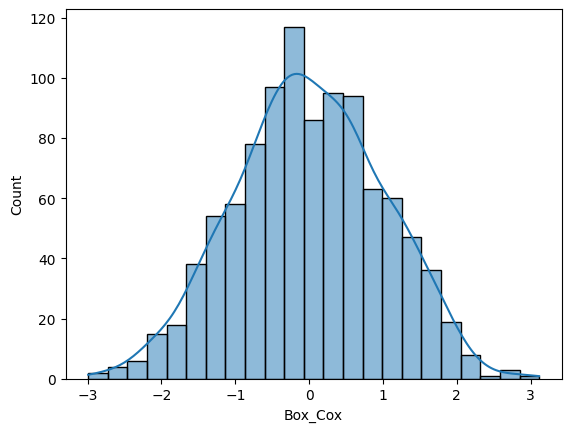

<Axes: xlabel='Yeo', ylabel='Count'>

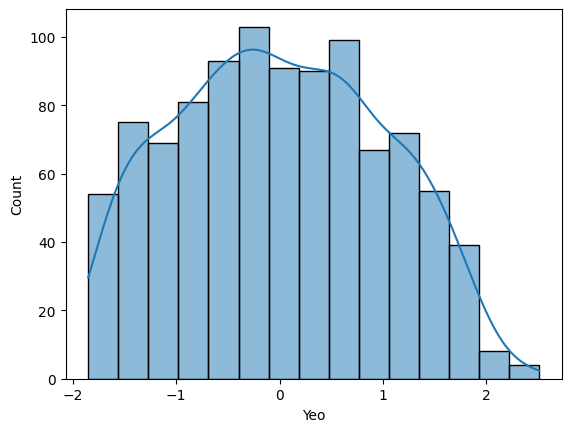

In [151]:
sns.histplot(df['Box_Cox'],kde = True)

plt.show()
sns.histplot(df['Yeo'],kde = True)

<Axes: xlabel='Quantile', ylabel='Count'>

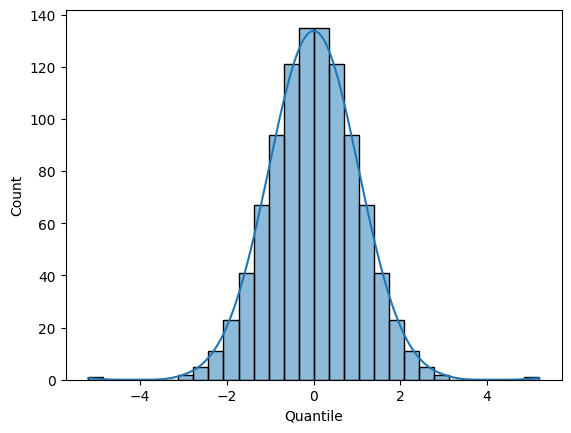

In [153]:
sns.histplot(df['Quantile'], bins=30, kde=True)